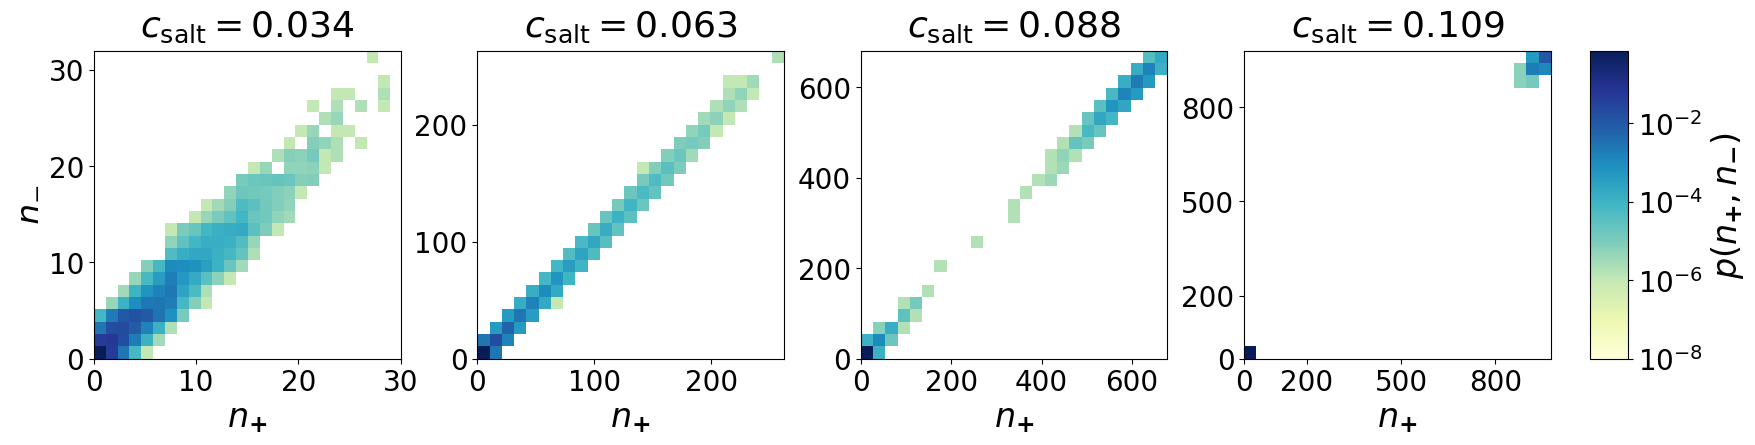

In [6]:
import os, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

base_dir = "./"
os.chdir(base_dir)
comp_files = sorted(glob.glob("cluster_comp_MD_0.2_LJ_*.csv"))
r_values = [0.05, 0.1, 0.15, 0.2]
c_salt_templete = [0.034, 0.063, 0.088, 0.109]

n_cols = len(r_values)
fig, axs = plt.subplots(1, n_cols, figsize=(4 * n_cols + 3.3, 4),
                        gridspec_kw={'wspace': 0.25, 'hspace': 0.3})
ims = []

for col, r in enumerate(r_values):
    ax = axs[col]
    data_path = f"{base_dir}cluster_comp_MD_0.2_LJ_{r}.csv"
    data = pd.read_csv(data_path)

    data_pivot = data.pivot(index="n_minus", columns="n_plus", values="probability").fillna(0)
    X, Y = np.meshgrid(data_pivot.columns, data_pivot.index)
    Z = data_pivot.values

    im = ax.pcolormesh(X, Y, Z, norm=LogNorm(vmin=1e-8), cmap='YlGnBu', shading='auto')
    ims.append(im)

    ax.set_title(fr"$c_{{\mathrm{{salt}}}} = {c_salt_templete[col]}$", fontsize=26, pad=10)
    if col == 0:
        ax.set_ylabel(r"$n_{\mathbf{-}}$", fontsize=24)
    ax.set_xlabel(r"$n_{\mathbf{+}}$", fontsize=24)
    ax.tick_params(labelsize=20)

fig.subplots_adjust(right=0.88)
cbar_ax = fig.add_axes([0.90, 0.11, 0.02, 0.77])
cbar = fig.colorbar(ims[0], cax=cbar_ax, orientation='vertical')
cbar.set_label(r'$p(n_{\mathbf{+}}, n_{\mathbf{-}})$', fontsize=24)
cbar.ax.tick_params(labelsize=20)
axs[0].set_xticks([0, 10, 20, 30])
axs[0].set_yticks([0, 10, 20, 30])
axs[1].set_xticks([0, 100, 200])
axs[1].set_yticks([0, 100, 200])
axs[2].set_xticks([0, 200, 400, 600])
axs[2].set_yticks([0, 200, 400, 600])
axs[3].set_xticks([0, 200, 500, 800])
axs[3].set_yticks([0, 200, 500, 800])
plt.show()